# Regresion Logistica

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, recall_score, f1_score, classification_report, 
    confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, r2_score
)
import matplotlib.pyplot as plt

# Limpieza de datos y Preprocesmiento

In [38]:
# Cargar los datasets
df_train = pd.read_csv('./dataset/train.csv')
df_test = pd.read_csv('./dataset/test.csv')

def clean_data(df):
    # Rellenar valores faltantes
    df['Year'] = df['Year'].fillna(df['Year'].median())
    df['Publisher'] = df['Publisher'].fillna('Unknown')
    if 'Summary' in df.columns:
        df = df.drop(columns=['Summary'])  # Eliminar columna irrelevante
    return df

def convert_to_numeric(value):
    value_str = str(value)
    if 'K' in value_str:
        return float(value_str.replace('K', '')) * 1000
    try:
        return float(value_str)
    except ValueError:
        return 0.0

def preprocess_data(df):
    df = clean_data(df)
    numerical_cols = ['North America', 'Europe', 'Japan', 'Rest of World', 
                      'Global', 'Number of Reviews', 'Wishlist']
    for col in numerical_cols:
        df[col] = df[col].apply(convert_to_numeric)

    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    label_encoder = LabelEncoder()
    categorical_cols = ['Game Title', 'Publisher', 'Platform', 'Genre']
    for col in categorical_cols:
        if col in df.columns:
            df[col] = label_encoder.fit_transform(df[col])

    return df

# Preprocesar los datasets
df_train = preprocess_data(df_train)
df_test = preprocess_data(df_test)

# Variables predictoras y objetivo

In [39]:
# Variables predictoras y objetivo
X = df_train.drop(columns=['Rating', 'Genre'])
y = df_train['Genre']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión logistica

In [40]:
# Ajuste de hiperparámetros con GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'max_iter': [1000, 2000]
}
grid = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Mejor modelo
logistic_model = grid.best_estimator_
print("Mejores parámetros para Regresión Logística:", grid.best_params_)

/Users/spark/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/spark/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/spark/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as

Mejores parámetros para Regresión Logística: {'C': 0.01, 'max_iter': 2000, 'penalty': 'l2'}


/Users/spark/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Evaluar el modelo

/Users/spark/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spark/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/spark/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Precisión (Accuracy): 0.1587
Recall promedio (Macro-average): 0.0675
F1-score promedio (Macro-average): 0.0399
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.15      0.61      0.24       318
           1       0.14      0.26      0.18       243
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00       122
           6       0.00      0.00      0.00        16
           7       0.00      0.00      0.00         1
           8       0.08      0.00      0.01       228
           9       0.00      0.00      0.00         3
          11       0.00      0.00      0.00        98
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00        84
          14       0.20      0.51      0.28        41
          15       0.00      0.00      0.00       13

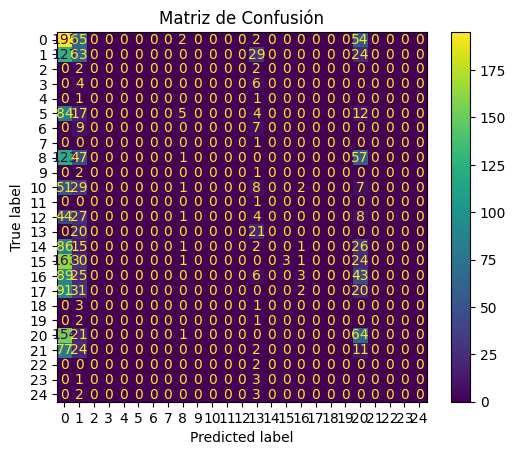

In [41]:
# Predicciones
y_pred = logistic_model.predict(X_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Precisión (Accuracy): {accuracy:.4f}")
print(f"Recall promedio (Macro-average): {recall:.4f}")
print(f"F1-score promedio (Macro-average): {f1:.4f}")
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='viridis')
plt.title("Matriz de Confusión")
plt.show()

# Cross Validation


In [42]:
scores = cross_val_score(logistic_model, X, y, cv=5, scoring='accuracy')
print(f"Accuracy promedio en validación cruzada: {scores.mean():.4f}")
print(f"Desviación estándar del Accuracy: {scores.std():.4f}")

/Users/spark/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/spark/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/spark/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as

Accuracy promedio en validación cruzada: 0.1185
Desviación estándar del Accuracy: 0.0503


/Users/spark/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Guardar el modelo

In [43]:
# Predicciones sobre el dataset de prueba
columns_to_drop = ['Rating', 'Genre']  # Validar columnas antes de eliminarlas
X_test_kaggle = df_test.drop(columns=[col for col in columns_to_drop if col in df_test.columns])

# Realizar predicciones con el modelo entrenado
predictions = logistic_model.predict(X_test_kaggle)

# Guardar las predicciones en un archivo CSV
submission = pd.DataFrame({
    'id': df_test['id'],
    'Genre_Prediction': predictions
})
submission.to_csv('logistic_regression_genre_predictions.csv', index=False)
print("Predicciones guardadas en 'logistic_regression_genre_predictions.csv'")

KeyError: "['Rating'] not found in axis"

# Metricas para Regresion


In [ ]:
X_reg = df_train.drop(columns=['Rating', 'Genre'])
y_reg = df_train['Rating']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)



#Entrenamiento

ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_reg, y_train_reg)

# Predicciones
y_pred_reg = ridge_model.predict(X_test_reg)



#Evaluacion

# Métricas
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

# Gráfico de valores reales vs predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.6)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', color="red")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Regresión: Valores Reales vs Predicciones")
plt.show()

# Ajuste de hiperparámetros con GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(Ridge(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train_reg, y_train_reg)

# Mejor modelo
ridge_model = grid.best_estimator_
print("Mejor alpha para Ridge:", grid.best_params_)

# Reentrenar con los mejores parámetros
ridge_model.fit(X_train_reg, y_train_reg)